# NLP Assignement 2-3



## User identification with URLs

# 1. Data importation

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("C:/Users/xavca/Documents/ESCP - MBD/2T - NLP/small_train.csv", sep = ',')
test = pd.read_csv("C:/Users/xavca/Documents/ESCP - MBD/2T - NLP/small_test.csv", sep = ',')

In [3]:
train = train.head(n=1000)
test = test.head(n=1000)

##  .Data Exploration

In [4]:
print(train.ID.value_counts())
print(test.ID.value_counts())

933        2
1886207    1
74385      1
4987561    1
387752     1
          ..
130371     1
1289534    1
1121594    1
130360     1
802819     1
Name: ID, Length: 999, dtype: int64
1949587    1
1901281    1
2503419    1
1817338    1
1128086    1
          ..
3095936    1
702353     1
2219828    1
48506      1
1223221    1
Name: ID, Length: 1000, dtype: int64


In [5]:
print(train.isna().sum())
print(test.isna().sum())

ID           0
keywords    97
age          0
sex          0
dtype: int64
ID             0
keywords     114
age         1000
sex         1000
dtype: int64


In [6]:
import missingno as msno

AxesSubplot(0.125,0.125;0.698618x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)


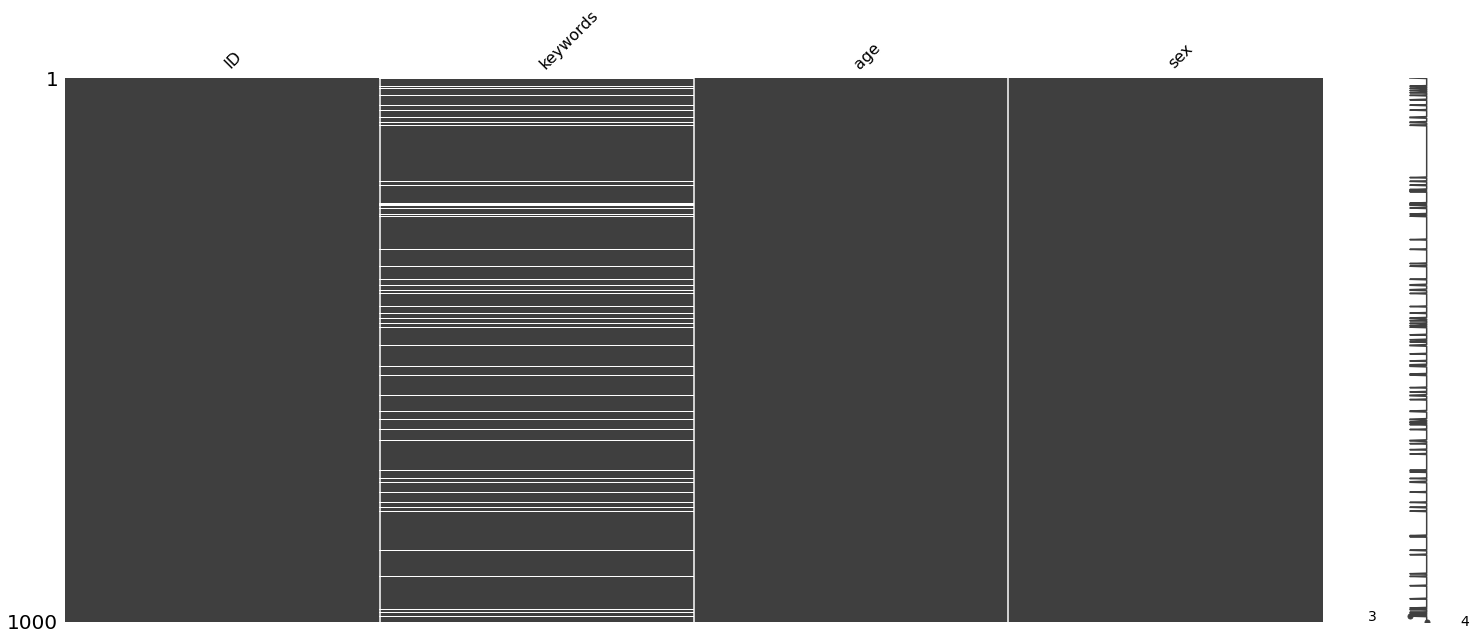

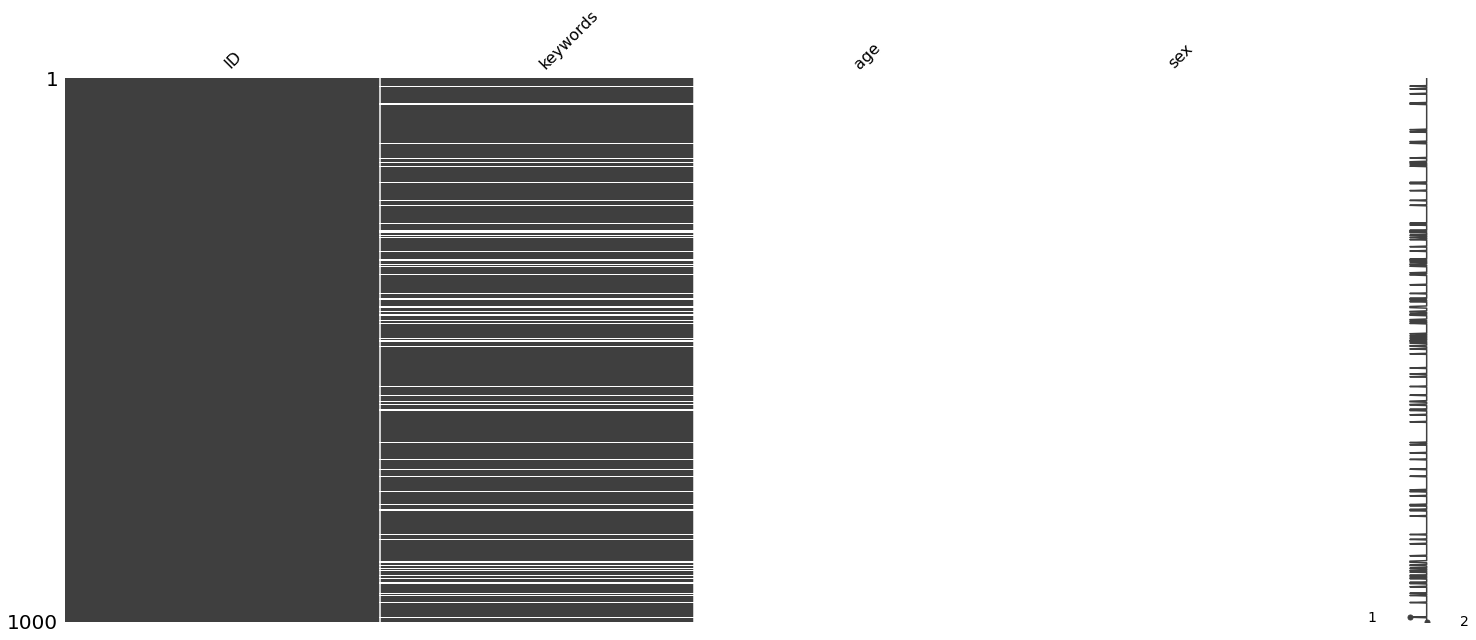

In [7]:
print(msno.matrix(train))
print(msno.matrix(test))

## .Data Cleaning


In [8]:
print(train.head())
print(test.head())

        ID                                           keywords  age sex
0   696449                                                NaN   50   M
1   361410  forum:3;contrat:1;calcul:3;conges:1;mission:4;...   47   M
2   211450  villa:1;location:2;aquitaine:2;maison:1;vacanc...   61   F
3  1368807  trafic:1;tournante:1;drogue:1;france:1;plaque:...   45   M
4  3502570  trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...   22   M
        ID                                           keywords  age  sex
0  1136369  kasha:1;morizet:1;grillee:1;cuisine:1;savoir:1...  NaN  NaN
1  2684755  programme:1;qui:1;coupee:1;television:1;montag...  NaN  NaN
2   130714  f75875b5:1;signin:1;signout:1;preavis:1;29d4:1...  NaN  NaN
3   338096  qui:1;les:1;embarrasse:1;international:1;democ...  NaN  NaN
4  2417963  lycee:1;photo:1;raspail:1;ledez:1;annabelle:1;...  NaN  NaN


In [9]:
def slicer(str_list):
        words=''
        for string in str_list.split(';'):
            couple = string.split(':')
            words = words + (couple[0] + ' ')*int(couple[1])
        return words

train_keywords = []
for cell in train['keywords']:
    if type(cell) == str:
        train_keywords.append(str(slicer(cell)))
    else:
        train_keywords.append('')
train['keywords'] = train_keywords
print(train.head())

test_keywords = []
for cell in test['keywords']:
    if type(cell) == str:
        test_keywords.append(str(slicer(cell)))
    else:
        test_keywords.append('')
test['keywords'] = test_keywords
print(test.head())

        ID                                           keywords  age sex
0   696449                                                      50   M
1   361410  forum forum forum contrat calcul calcul calcul...   47   M
2   211450  villa location location aquitaine aquitaine ma...   61   F
3  1368807  trafic tournante drogue france plaque actualit...   45   M
4  3502570  trafic septembre greve sncf sortir perturbatio...   22   M
        ID                                           keywords  age  sex
0  1136369  kasha morizet grillee cuisine savoir tout grai...  NaN  NaN
1  2684755  programme qui coupee television montage fausse...  NaN  NaN
2   130714  f75875b5 signin signout preavis 29d4 essai 002...  NaN  NaN
3   338096  qui les embarrasse international democrates cl...  NaN  NaN
4  2417963  lycee photo raspail ledez annabelle brest anni...  NaN  NaN


## .Training and test set splitting

In [10]:
train['sex_num'] = train.sex.map({'M':1, 'F':0})
test['sex_num'] = train.sex.map({'M':1, 'F':0})


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train["keywords"], train["sex_num"], test_size = 0.2, random_state = 42)

Z_train, Z_test, z_train, z_test = train_test_split(test["keywords"], test["sex_num"], test_size = 0.2, random_state = 42)


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800,)
(200,)
(800,)
(200,)


# 2. Vectorization

### CountVectorizer - Tokenization 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

In [13]:
vec.fit(X_train)

CountVectorizer()

In [14]:
print(vec.get_feature_names()[0:10])
print(vec.get_feature_names()[-10:])

['002aok2msbbrlpg', '002bbm490nqzfji', '002bi2judxzmyp9', '002bi49x3lgh3o', '002bqsfd6w1gxnk', '002cmbt68lllbqd', '002du1zwtuj6gk0', '002erft4zib90om', '002fvc3elxpszp0', '002gc8fn4ir9o31']
['yvette', 'zahia', 'zaibat', 'zapping', 'zebre', 'zodiaque', 'zonage', 'zone', 'zoom', 'zte']


In [15]:
print("Vocabulary size: {}".format(len(vec.vocabulary_)))
print("Vocabulary content:\n {}".format(vec.vocabulary_))

Vocabulary size: 4956
Vocabulary content:
 {'william': 4920, 'des': 1487, 'classes': 1068, 'photos': 3585, 'princes': 3775, 'george': 2204, 'princesses': 3777, 'harry': 2322, 'retrospective': 4058, 'celebrites': 917, 'rentree': 4014, 'seisme': 4261, 'violent': 4847, 'mexico': 3048, 'international': 2508, 'frappe': 2122, 'par': 3449, 'synthese': 4495, 'france': 2114, 'souel': 4390, 'previsions': 3765, 'meteo': 3033, 'ville': 4835, 'trocs': 4686, 'moisis': 3106, 'sciences': 4224, 'conso': 1206, 'affich': 249, 'colocation': 1110, 'dons': 1619, 'habitation': 2303, 'lepotironfr': 2732, 'nettoyes': 3225, 'legumes': 2723, 'taxe': 4535, 'manger': 2903, 'fruits': 2137, 'une': 4717, 'plateforme': 3630, 'peut': 3576, 'aliments': 303, 'forum': 2098, 'viol': 4843, 'pourquoi': 3709, 'regarder': 3975, 'faut': 1967, 'telefilm': 4548, 'loisirs': 2806, 'union': 4719, 'les': 2734, 'vingt': 4841, 'defis': 1426, 'face': 1933, 'aux': 532, 'plusieurs': 3642, 'vitesses': 4864, 'sept': 4279, 'caunes': 898, 'an

In [16]:
X_train_df = {}

X_train_df['Gender_CountVec'] = vec.transform(X_train)
X_train_df['Gender_CountVec'][:3].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2]),
 array([ 917, 1068, 1487, 2204, 2322, 3585, 3775, 3777, 4014, 4058, 4920,
        2122, 2508, 3048, 3449, 4261, 4847, 2114, 3033, 3765, 4390, 4495,
        4835]))

## TF-idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(X_train)

TfidfVectorizer()

In [18]:
print(vec.get_feature_names()[0:10])
print(vec.get_feature_names()[-10:])

['002aok2msbbrlpg', '002bbm490nqzfji', '002bi2judxzmyp9', '002bi49x3lgh3o', '002bqsfd6w1gxnk', '002cmbt68lllbqd', '002du1zwtuj6gk0', '002erft4zib90om', '002fvc3elxpszp0', '002gc8fn4ir9o31']
['yvette', 'zahia', 'zaibat', 'zapping', 'zebre', 'zodiaque', 'zonage', 'zone', 'zoom', 'zte']


In [19]:
print("Vocabulary size: {}".format(len(vec.vocabulary_)))
print("Vocabulary content:\n {}".format(vec.vocabulary_))

Vocabulary size: 4956
Vocabulary content:
 {'william': 4920, 'des': 1487, 'classes': 1068, 'photos': 3585, 'princes': 3775, 'george': 2204, 'princesses': 3777, 'harry': 2322, 'retrospective': 4058, 'celebrites': 917, 'rentree': 4014, 'seisme': 4261, 'violent': 4847, 'mexico': 3048, 'international': 2508, 'frappe': 2122, 'par': 3449, 'synthese': 4495, 'france': 2114, 'souel': 4390, 'previsions': 3765, 'meteo': 3033, 'ville': 4835, 'trocs': 4686, 'moisis': 3106, 'sciences': 4224, 'conso': 1206, 'affich': 249, 'colocation': 1110, 'dons': 1619, 'habitation': 2303, 'lepotironfr': 2732, 'nettoyes': 3225, 'legumes': 2723, 'taxe': 4535, 'manger': 2903, 'fruits': 2137, 'une': 4717, 'plateforme': 3630, 'peut': 3576, 'aliments': 303, 'forum': 2098, 'viol': 4843, 'pourquoi': 3709, 'regarder': 3975, 'faut': 1967, 'telefilm': 4548, 'loisirs': 2806, 'union': 4719, 'les': 2734, 'vingt': 4841, 'defis': 1426, 'face': 1933, 'aux': 532, 'plusieurs': 3642, 'vitesses': 4864, 'sept': 4279, 'caunes': 898, 'an

In [20]:
X_train_df['Gender_TF-idf'] = vec.transform(X_train)
X_train_df['Gender_TF-idf'][:3].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2]),
 array([4920, 4058, 4014, 3777, 3775, 3585, 2322, 2204, 1487, 1068,  917,
        4847, 4261, 3449, 3048, 2508, 2122, 4835, 4495, 4390, 3765, 3033,
        2114]))

# 3.Machine learning modelling

In [21]:
performance = pd.DataFrame()

In [22]:
# Dictionnary to store the results of ours ML models
prediction = dict() 

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

ML_models = {'MultinomialNB' : MultinomialNB(),'AdaBoostClassifier' : AdaBoostClassifier(),'LogisticRegression' : LogisticRegression(),'SVM' : svm.SVC(),'RandomForestClassifier' : RandomForestClassifier()}
print("List of Machine Learning models available :",list(ML_models.keys()))

List of Machine Learning models available : ['MultinomialNB', 'AdaBoostClassifier', 'LogisticRegression', 'SVM', 'RandomForestClassifier']


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, plot_roc_curve

for VECTORIZER in list(X_train_df.keys()):
    for MODEL_TO_TEST in list(ML_models.keys()):
        model = ML_models[MODEL_TO_TEST]
        model.fit(X_train_df[VECTORIZER], y_train)
        X_test_df = vec.transform(X_test)
        prediction[MODEL_TO_TEST] = model.predict(X_test_df)
        # Store the accuracy
        performance.loc[VECTORIZER+" - "+MODEL_TO_TEST,'Weighted Average Accuracy'] = precision_score(y_test, prediction[MODEL_TO_TEST], average='weighted')
        print("Vectorizer: ",VECTORIZER,"     ML model: ",MODEL_TO_TEST)
        print(classification_report(y_test, prediction[MODEL_TO_TEST]))
        print(precision_score(y_test, prediction[MODEL_TO_TEST], average='weighted'))
        print(sum(prediction[MODEL_TO_TEST]==y_test)/len(y_test))
        
        

Vectorizer:  Gender_CountVec      ML model:  MultinomialNB
              precision    recall  f1-score   support

           0       0.56      0.28      0.38        96
           1       0.55      0.80      0.65       104

    accuracy                           0.55       200
   macro avg       0.55      0.54      0.51       200
weighted avg       0.55      0.55      0.52       200

0.5539473684210526
0.55
Vectorizer:  Gender_CountVec      ML model:  AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        96
           1       0.52      0.98      0.68       104

    accuracy                           0.52       200
   macro avg       0.51      0.50      0.36       200
weighted avg       0.51      0.52      0.37       200

0.5106122448979592
0.52
Vectorizer:  Gender_CountVec      ML model:  LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.08      0.15        96
  

C:\Users\xavca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.52      1.00      0.68       104

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.36       200

0.2704
0.52
Vectorizer:  Gender_CountVec      ML model:  RandomForestClassifier
              precision    recall  f1-score   support

           0       0.54      0.07      0.13        96
           1       0.52      0.94      0.67       104

    accuracy                           0.53       200
   macro avg       0.53      0.51      0.40       200
weighted avg       0.53      0.53      0.41       200

0.5309749074454957
0.525
Vectorizer:  Gender_TF-idf      ML model:  MultinomialNB
              precision    recall  f1-score   support

           0       0.53      0.17      0.25        96
           1       0.53      0.87      0.66       104

    accuracy        

In [25]:
print(performance)

                                          Weighted Average Accuracy
Gender_CountVec - MultinomialNB                            0.553947
Gender_CountVec - AdaBoostClassifier                       0.510612
Gender_CountVec - LogisticRegression                       0.707086
Gender_CountVec - SVM                                      0.270400
Gender_CountVec - RandomForestClassifier                   0.530975
Gender_TF-idf - MultinomialNB                              0.531294
Gender_TF-idf - AdaBoostClassifier                         0.572623
Gender_TF-idf - LogisticRegression                         0.527884
Gender_TF-idf - SVM                                        0.529780
Gender_TF-idf - RandomForestClassifier                     0.481157


In [26]:
print(y_test)

521    1
737    1
740    0
660    1
411    1
      ..
408    1
332    0
208    0
613    1
78     1
Name: sex_num, Length: 200, dtype: int64


## Age clustering

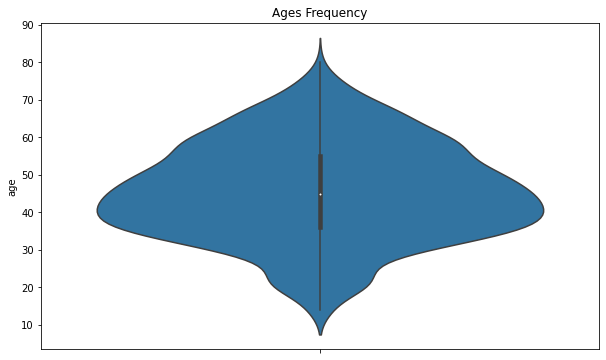

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["age"])
plt.show()

In [28]:
print(train['age'].head(10))

0    50
1    47
2    61
3    45
4    22
5    55
6    57
7    34
8    44
9    40
Name: age, dtype: int64


In [29]:
train.loc[train['age']<=15,'age_cat'] = 0
train.loc[(15<train['age'])&(train['age']<=25),'age_cat'] = 1
train.loc[(25<train['age'])&(train['age']<=35),'age_cat'] = 2
train.loc[(35<train['age'])&(train['age']<=45),'age_cat'] = 3
train.loc[(45<train['age'])&(train['age']<=55),'age_cat'] = 4
train.loc[(55<train['age'])&(train['age']<=65),'age_cat'] = 5
train.loc[65<train['age'],'age_cat'] = 6


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train["keywords"], train["age_cat"], test_size = 0.2, random_state = 42)

In [30]:
print(train.head(100))

         ID                                           keywords  age sex  \
0    696449                                                      50   M   
1    361410  forum forum forum contrat calcul calcul calcul...   47   M   
2    211450  villa location location aquitaine aquitaine ma...   61   F   
3   1368807  trafic tournante drogue france plaque actualit...   45   M   
4   3502570  trafic septembre greve sncf sortir perturbatio...   22   M   
..      ...                                                ...  ...  ..   
95  6920633  reines reines quetsches quetsches quetsches qu...   23   F   
96   208659  val+de+marne france maison ile+de+france annon...   20   M   
97  3121699  cafe cafe man man gr=one gr=one show show pers...   56   F   
98   795131  campanie campanie campanie campanie campanie c...   64   F   
99   935991                               faq definition bile    62   F   

    sex_num  age_cat  
0         1      4.0  
1         1      4.0  
2         0      5.0  
3      

In [31]:
X_train_df = {}


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(X_train)
X_train_df['Age_TF-idf'] = vec.transform(X_train)
X_train_df['Age_TF-idf'][:3].nonzero()



from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vec.fit(X_train)
X_train_df['Age_CountVec'] = vec.transform(X_train)
X_train_df['Age_CountVec'][:3].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2]),
 array([ 917, 1068, 1487, 2204, 2322, 3585, 3775, 3777, 4014, 4058, 4920,
        2122, 2508, 3048, 3449, 4261, 4847, 2114, 3033, 3765, 4390, 4495,
        4835]))

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_score

for VECTORIZER in ['Age_TF-idf','Age_CountVec']:
    for MODEL_TO_TEST in list(ML_models.keys()):
        model = ML_models[MODEL_TO_TEST]
        model.fit(X_train_df[VECTORIZER], y_train)
        X_test_df = vec.transform(X_test)
        prediction[MODEL_TO_TEST] = model.predict(X_test_df)
        # Store the accuracy
        performance.loc[VECTORIZER+" - "+MODEL_TO_TEST,'Weighted Average Accuracy'] = precision_score(y_test,prediction[MODEL_TO_TEST],average='weighted')
        print("Vectorizer: ",VECTORIZER,"     ML model: ",MODEL_TO_TEST)
        print(classification_report(y_test, prediction[MODEL_TO_TEST]))
        print(precision_score(y_test, prediction[MODEL_TO_TEST], average='weighted'))
        print(sum(prediction[MODEL_TO_TEST]==y_test)/len(y_test))
        

Vectorizer:  Age_TF-idf      ML model:  MultinomialNB
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00        11
         2.0       0.29      0.06      0.11        31
         3.0       0.43      0.74      0.55        73
         4.0       0.20      0.39      0.27        31
         5.0       0.11      0.03      0.04        36
         6.0       0.00      0.00      0.00        17

    accuracy                           0.34       200
   macro avg       0.15      0.17      0.14       200
weighted avg       0.25      0.34      0.26       200

0.25349113801452783
0.345


C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vectorizer:  Age_TF-idf      ML model:  AdaBoostClassifier
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.25      0.09      0.13        11
         2.0       0.25      0.10      0.14        31
         3.0       0.39      0.74      0.51        73
         4.0       0.20      0.16      0.18        31
         5.0       0.13      0.06      0.08        36
         6.0       0.20      0.06      0.09        17

    accuracy                           0.33       200
   macro avg       0.20      0.17      0.16       200
weighted avg       0.27      0.33      0.27       200

0.2673260869565217
0.33


C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vectorizer:  Age_TF-idf      ML model:  LogisticRegression
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.40      0.18      0.25        11
         2.0       0.27      0.19      0.23        31
         3.0       0.45      0.59      0.51        73
         4.0       0.17      0.19      0.18        31
         5.0       0.21      0.17      0.18        36
         6.0       0.07      0.06      0.06        17

    accuracy                           0.32       200
   macro avg       0.23      0.20      0.20       200
weighted avg       0.30      0.32      0.30       200

0.2993674900417187
0.32


C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vectorizer:  Age_TF-idf      ML model:  SVM
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00        31
         3.0       0.38      0.90      0.53        73
         4.0       0.21      0.16      0.18        31
         5.0       0.00      0.00      0.00        36
         6.0       0.00      0.00      0.00        17

    accuracy                           0.36       200
   macro avg       0.08      0.15      0.10       200
weighted avg       0.17      0.35      0.22       200

0.16994880952380953
0.355


C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:122

Vectorizer:  Age_TF-idf      ML model:  RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      0.09      0.15        11
         2.0       0.14      0.13      0.14        31
         3.0       0.50      0.32      0.39        73
         4.0       0.19      0.39      0.25        31
         5.0       0.24      0.36      0.29        36
         6.0       0.17      0.06      0.09        17

    accuracy                           0.27       200
   macro avg       0.25      0.19      0.19       200
weighted avg       0.32      0.27      0.27       200

0.31870535714285714
0.27
Vectorizer:  Age_CountVec      ML model:  MultinomialNB
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      0.18      0.27        11
         2.0       0.21      0.26      0.23        31
         3.0       0.38      0.37      0.3

C:\Users\xavca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no

Vectorizer:  Age_CountVec      ML model:  LogisticRegression
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      0.09      0.14        11
         2.0       0.20      0.16      0.18        31
         3.0       0.51      0.49      0.50        73
         4.0       0.20      0.48      0.28        31
         5.0       0.10      0.06      0.07        36
         6.0       0.17      0.06      0.09        17

    accuracy                           0.30       200
   macro avg       0.22      0.19      0.18       200
weighted avg       0.30      0.30      0.28       200

0.2998063909774436
0.3


C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vectorizer:  Age_CountVec      ML model:  SVM
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00        11
         2.0       0.50      0.03      0.06        31
         3.0       0.37      1.00      0.54        73
         4.0       0.00      0.00      0.00        31
         5.0       0.00      0.00      0.00        36
         6.0       0.00      0.00      0.00        17

    accuracy                           0.37       200
   macro avg       0.12      0.15      0.09       200
weighted avg       0.21      0.37      0.21       200

0.212753807106599
0.37
Vectorizer:  Age_CountVec      ML model:  RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      0.09      0.15        11
         2.0       0.20      0.13      0.16        31
         3.0       0.45      0.41      0.43        7

C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
performance

,Weighted Average Accuracy
Gender_CountVec - MultinomialNB,0.553947
Gender_CountVec - AdaBoostClassifier,0.510612
Gender_CountVec - LogisticRegression,0.707086
Gender_CountVec - SVM,0.270400
Gender_CountVec - RandomForestClassifier,0.530975
Gender_TF-idf - MultinomialNB,0.531294
Gender_TF-idf - AdaBoostClassifier,0.572623
Gender_TF-idf - LogisticRegression,0.527884
Gender_TF-idf - SVM,0.529780
Gender_TF-idf - RandomForestClassifier,0.481157


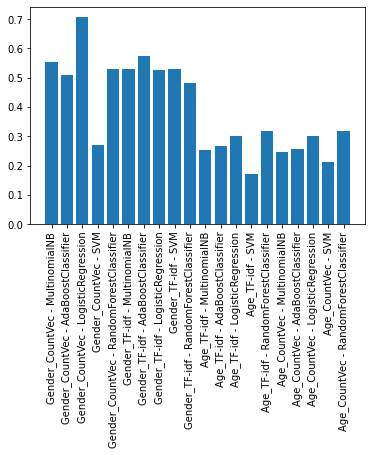

In [34]:
plt.bar(performance.index,performance['Weighted Average Accuracy'])
plt.xticks(rotation=90)
plt.show()

##### After testing every machine learning models seen in class and with 2 vectorization technique: TF-idf and Count Vectorizer, we can compare accuracy. To predict Gender, the logistic regression with count vectorizer clearly stands out with a weighted average precision at 0.707. To predict age, it was necessary to create categories to gain in precision. After the creation of 7 categories we test the vectorization, ML modelling and compare the weighted average precision again. Random forest classifier is the most accurate model and especially with Count Vectorizer. 

Now we can apply our model to the test set. 


# Application of Logistic Regression and Random Forest Classifier with Count Vectorizer on the test set

In [35]:
train = pd.read_csv("C:/Users/xavca/Documents/ESCP - MBD/2T - NLP/small_train.csv", sep = ',')
test = pd.read_csv("C:/Users/xavca/Documents/ESCP - MBD/2T - NLP/small_test.csv", sep = ',')

In [36]:
train = train.head(n=1000)
test = test.head(n=1000)

In [37]:
train_keywords = []
for cell in train['keywords']:
    if type(cell) == str:
        train_keywords.append(str(slicer(cell)))
    else:
        train_keywords.append('')
train['keywords'] = train_keywords
print(train.head())

test_keywords = []
for cell in test['keywords']:
    if type(cell) == str:
        test_keywords.append(str(slicer(cell)))
    else:
        test_keywords.append('')
test['keywords'] = test_keywords
print(test.head())

        ID                                           keywords  age sex
0   696449                                                      50   M
1   361410  forum forum forum contrat calcul calcul calcul...   47   M
2   211450  villa location location aquitaine aquitaine ma...   61   F
3  1368807  trafic tournante drogue france plaque actualit...   45   M
4  3502570  trafic septembre greve sncf sortir perturbatio...   22   M
        ID                                           keywords  age  sex
0  1136369  kasha morizet grillee cuisine savoir tout grai...  NaN  NaN
1  2684755  programme qui coupee television montage fausse...  NaN  NaN
2   130714  f75875b5 signin signout preavis 29d4 essai 002...  NaN  NaN
3   338096  qui les embarrasse international democrates cl...  NaN  NaN
4  2417963  lycee photo raspail ledez annabelle brest anni...  NaN  NaN


In [38]:
train['sex_num'] = train.sex.map({'M':1, 'F':0})
test['sex_num'] = train.sex.map({'M':1, 'F':0})

from sklearn.model_selection import train_test_split

X_train_Gender, Z_test, y_train_Gender, z_test = train_test_split(train["keywords"], train["sex_num"], test_size = 0.2, random_state = 42)
Z_train, X_test_Gender, z_train, y_test_Gender = train_test_split(test["keywords"], test["sex_num"], test_size = 0.2, random_state = 42)


In [39]:
train.loc[train['age']<=15,'age_cat'] = 0
train.loc[(15<train['age'])&(train['age']<=25),'age_cat'] = 1
train.loc[(25<train['age'])&(train['age']<=35),'age_cat'] = 2
train.loc[(35<train['age'])&(train['age']<=45),'age_cat'] = 3
train.loc[(45<train['age'])&(train['age']<=55),'age_cat'] = 4
train.loc[(55<train['age'])&(train['age']<=65),'age_cat'] = 5
train.loc[65<train['age'],'age_cat'] = 6

test.loc[test['age']<=15,'age_cat'] = 0
test.loc[(15<test['age'])&(test['age']<=25),'age_cat'] = 1
test.loc[(25<test['age'])&(test['age']<=35),'age_cat'] = 2
test.loc[(35<test['age'])&(test['age']<=45),'age_cat'] = 3
test.loc[(45<test['age'])&(test['age']<=55),'age_cat'] = 4
test.loc[(55<test['age'])&(test['age']<=65),'age_cat'] = 5
test.loc[65<test['age'],'age_cat'] = 6



X_train_Age, Z_test, y_train_Age, z_test = train_test_split(train["keywords"], train["age_cat"], test_size = 0.2, random_state = 42)
Z_train, X_test_Age, z_train, y_test_Age = train_test_split(test["keywords"], test["age_cat"], test_size = 0.2, random_state = 42)


In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vec = CountVectorizer()
vec.fit(X_train_Gender)
X_train_df['Gender_CountVec'] = vec.transform(X_train_Gender)
X_train_df['Gender_CountVec'][:3].nonzero()

vec = TfidfVectorizer()
vec.fit(X_train_Age)
X_train_df['Age_TFidf'] = vec.transform(X_train_Age)
X_train_df['Age_TFidf'][:3].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2]),
 array([4920, 4058, 4014, 3777, 3775, 3585, 2322, 2204, 1487, 1068,  917,
        4847, 4261, 3449, 3048, 2508, 2122, 4835, 4495, 4390, 3765, 3033,
        2114]))

In [41]:
prediction = pd.DataFrame() 

In [42]:
model = ML_models['LogisticRegression']
model.fit(X_train_df['Gender_CountVec'], y_train_Gender)
X_test_df = vec.transform(X_test_Gender)
prediction['sex_pred'] = model.predict(X_test_df)

print(prediction['sex_pred'])

model = ML_models['RandomForestClassifier']
model.fit(X_train_df['Age_TFidf'], y_train_Age)
X_test_df = vec.transform(X_test_Age)
prediction['age_pred'] = model.predict(X_test_df)
        
print(prediction['age_pred'])

prediction['sex_pred'] = prediction['sex_pred'].map({1:'M', 0:'F'})
prediction['age_pred'] = prediction['age_pred'].map({0:'<=15', 1:'15-25', 2:'25-35', 3:'35-45', 4:'45-55', 5:'55-65', 3:'65<'})
prediction['ID'] = test['ID']
prediction = prediction[['ID','age_pred','sex_pred']]
print(prediction.head())

print(prediction.sex_pred.value_counts())
print(prediction.age_pred.value_counts())



C:\Users\xavca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: sex_pred, Length: 200, dtype: int64
0      3.0
1      4.0
2      2.0
3      4.0
4      4.0
      ... 
195    4.0
196    4.0
197    4.0
198    3.0
199    4.0
Name: age_pred, Length: 200, dtype: float64
        ID age_pred sex_pred
0  1136369      65<        M
1  2684755    45-55        M
2   130714    25-35        M
3   338096    45-55        M
4  2417963    45-55        M
M    194
F      6
Name: sex_pred, dtype: int64
45-55    83
65<      76
25-35    21
55-65    18
Name: age_pred, dtype: int64


In [43]:
prediction.to_csv('C:/Users/xavca/Desktop/PredictionsResults.csv',index=False)